# A Guided Tour of LSST Calexps
<br>Owner(s): **David Shupe** ([@stargaser](https://github.com/LSSTScienceCollaborations/StackClub/issues/new?body=@stargaser))
<br>Last Verified to Run: **2020-08-10**
<br>Verified Stack Release: **v20.0.0**

We'll inspect a visit image ``calexp`` object, and then show how a coadd image differs.

### Learning Objectives:

After working through this tutorial you should be able to follow some best practices when working with ``calexp`` (image) objects.

### Logistics
This notebook is intended to be runnable on `lsst-lsp-stable.ncsa.illinois.edu` from a local git clone of https://github.com/LSSTScienceCollaborations/StackClub.

## Set-up

In [1]:
# This should match the verified version listed at the start of the notebook
! eups list -s lsst_distrib

   20.0.0     	current v20_0_0 setup


In [2]:
from pprint import pprint

In [3]:
from lsst.daf.persistence import Butler

In [4]:
import lsst.afw.display as afw_display

### Retrieving and inspecting a calexp

For the first part of this tutorial we will use HSC data from one of the testing patches.

Define a data directory and create a Butler

In [5]:
#our data directory containing some HSC data organized as Butler expects
datadir = "/datasets/hsc/repo/rerun/RC/v20_0_0_rc1/DM-25349/"   
butler = Butler(datadir)

Other notebooks show how to view what data are available in a Butler object. Here we get a specific one.

In [6]:
# Grab a calexp of interest
dataId = {'filter': 'HSC-Z', 'ccd': 32, 'visit': 38938} #Define a dictionary with the filter, ccd, and visit we wish to view
calexp = butler.get('calexp', **dataId)                 #retrieve the data using the `butler` instance and its function `get()`

### Image planes / pixel data

In terms of pixel data, a calexp contains an image, a mask, and a variance.

Let's see how to access the image.

In [7]:
calexp.image

lsst.afw.image.image.image.ImageF=[[  7.838125    7.8130755   7.788325  ...  22.226273   22.270308
   22.314651 ]
 [  7.826421    7.80138     7.7766385 ...  22.197598   22.241646
   22.286    ]
 [  7.814713    7.7899256   7.7651925 ...  22.169094   22.21315
   22.257513 ]
 ...
 [-38.96506   -38.99084   -39.015896  ...  -7.1182113  -7.09954
   -7.0807424]
 [-38.988384  -39.013977  -39.039074  ...  -7.1188035  -7.099884
   -7.08108  ]
 [-39.011284  -39.036926  -39.062077  ...  -7.119177   -7.100251
   -7.0814424]], bbox=(minimum=(0, 0), maximum=(2047, 4175))

To show the pixel data, we will make use of the matplotlib backend to `lsst.afw.display`.

Due to current limitations of this backend, the display must be defined and used in the same code cell, much as matplotlib commands in a notebook must all be in one cell to produce a plot.

In [8]:
%matplotlib inline

If the entire calexp is displayed, masks will be overlaid. Here we will eschew the mask display by showing only the image.

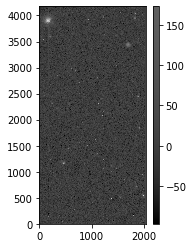

In [9]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(calexp.image)

To access the pixel values as an array, use the `.array` attribute.

In [10]:
data = calexp.image.array
data

array([[  7.838125 ,   7.8130755,   7.788325 , ...,  22.226273 ,
         22.270308 ,  22.314651 ],
       [  7.826421 ,   7.80138  ,   7.7766385, ...,  22.197598 ,
         22.241646 ,  22.286    ],
       [  7.814713 ,   7.7899256,   7.7651925, ...,  22.169094 ,
         22.21315  ,  22.257513 ],
       ...,
       [-38.96506  , -38.99084  , -39.015896 , ...,  -7.1182113,
         -7.09954  ,  -7.0807424],
       [-38.988384 , -39.013977 , -39.039074 , ...,  -7.1188035,
         -7.099884 ,  -7.08108  ],
       [-39.011284 , -39.036926 , -39.062077 , ...,  -7.119177 ,
         -7.100251 ,  -7.0814424]], dtype=float32)

In [11]:
data.__class__

numpy.ndarray

Let's list all the methods for our calexp.

In [12]:
calexp_methods = [m for m in dir(calexp) if not m.startswith('_')]

In [13]:
calexp_methods

['Factory',
 'clone',
 'convertD',
 'convertF',
 'dtype',
 'getBBox',
 'getCutout',
 'getDetector',
 'getDimensions',
 'getFilter',
 'getHeight',
 'getImage',
 'getInfo',
 'getMask',
 'getMaskedImage',
 'getMetadata',
 'getPhotoCalib',
 'getPsf',
 'getVariance',
 'getWcs',
 'getWidth',
 'getX0',
 'getXY0',
 'getY0',
 'hasPsf',
 'hasWcs',
 'image',
 'mask',
 'maskedImage',
 'readFits',
 'readFitsWithOptions',
 'setDetector',
 'setFilter',
 'setImage',
 'setInfo',
 'setMask',
 'setMaskedImage',
 'setMetadata',
 'setPhotoCalib',
 'setPsf',
 'setVariance',
 'setWcs',
 'setXY0',
 'subset',
 'variance',
 'writeFits',
 'writeFitsWithOptions']

Access the masked Image

In [14]:
calexp.maskedImage

lsst.afw.image.maskedImage.maskedImage.MaskedImageF=(image=[[  7.838125    7.8130755   7.788325  ...  22.226273   22.270308
   22.314651 ]
 [  7.826421    7.80138     7.7766385 ...  22.197598   22.241646
   22.286    ]
 [  7.814713    7.7899256   7.7651925 ...  22.169094   22.21315
   22.257513 ]
 ...
 [-38.96506   -38.99084   -39.015896  ...  -7.1182113  -7.09954
   -7.0807424]
 [-38.988384  -39.013977  -39.039074  ...  -7.1188035  -7.099884
   -7.08108  ]
 [-39.011284  -39.036926  -39.062077  ...  -7.119177   -7.100251
   -7.0814424]],
mask=[[21 21 21 ... 21 21 21]
 [21 21 21 ... 21 21 21]
 [21 21 21 ... 21 21 21]
 ...
 [21 21 21 ... 21 21 21]
 [21 21 21 ... 21 21 21]
 [21 21 21 ... 21 21 21]], maskPlaneDict={'BAD': 0, 'CR': 3, 'CROSSTALK': 9, 'DETECTED': 5, 'DETECTED_NEGATIVE': 6, 'EDGE': 4, 'INTRP': 2, 'NOT_DEBLENDED': 10, 'NO_DATA': 8, 'SAT': 1, 'SUSPECT': 7, 'UNMASKEDNAN': 11}
variance=[[3242.335 3242.335 3242.335 ... 3242.335 3242.335 3242.335]
 [3242.335 3242.335 3242.335 ... 3

Access the variance object and the underlying Numpy array

In [15]:
calexp.variance

lsst.afw.image.image.image.ImageF=[[3242.335 3242.335 3242.335 ... 3242.335 3242.335 3242.335]
 [3242.335 3242.335 3242.335 ... 3242.335 3242.335 3242.335]
 [3242.335 3242.335 3242.335 ... 3242.335 3242.335 3242.335]
 ...
 [3242.335 3242.335 3242.335 ... 3242.335 3242.335 3242.335]
 [3242.335 3242.335 3242.335 ... 3242.335 3242.335 3242.335]
 [3242.335 3242.335 3242.335 ... 3242.335 3242.335 3242.335]], bbox=(minimum=(0, 0), maximum=(2047, 4175))

In [16]:
calexp.variance.array

array([[3242.335, 3242.335, 3242.335, ..., 3242.335, 3242.335, 3242.335],
       [3242.335, 3242.335, 3242.335, ..., 3242.335, 3242.335, 3242.335],
       [3242.335, 3242.335, 3242.335, ..., 3242.335, 3242.335, 3242.335],
       ...,
       [3242.335, 3242.335, 3242.335, ..., 3242.335, 3242.335, 3242.335],
       [3242.335, 3242.335, 3242.335, ..., 3242.335, 3242.335, 3242.335],
       [3242.335, 3242.335, 3242.335, ..., 3242.335, 3242.335, 3242.335]],
      dtype=float32)

Access the mask and its underlying array

In [17]:
calexp.mask

lsst.afw.image.image.image.MaskX=[[21 21 21 ... 21 21 21]
 [21 21 21 ... 21 21 21]
 [21 21 21 ... 21 21 21]
 ...
 [21 21 21 ... 21 21 21]
 [21 21 21 ... 21 21 21]
 [21 21 21 ... 21 21 21]], bbox=(minimum=(0, 0), maximum=(2047, 4175)), maskPlaneDict={'BAD': 0, 'CR': 3, 'CROSSTALK': 9, 'DETECTED': 5, 'DETECTED_NEGATIVE': 6, 'EDGE': 4, 'INTRP': 2, 'NOT_DEBLENDED': 10, 'NO_DATA': 8, 'SAT': 1, 'SUSPECT': 7, 'UNMASKEDNAN': 11}

In [18]:
calexp.mask.array

array([[21, 21, 21, ..., 21, 21, 21],
       [21, 21, 21, ..., 21, 21, 21],
       [21, 21, 21, ..., 21, 21, 21],
       ...,
       [21, 21, 21, ..., 21, 21, 21],
       [21, 21, 21, ..., 21, 21, 21],
       [21, 21, 21, ..., 21, 21, 21]], dtype=int32)

Get the dimensions of the image, mask and variance

In [19]:
calexp.getDimensions()

Extent2I(2048, 4176)

The image, maskedImage and Exposure objects in `lsst.afw.display` include information on **LSST pixels**, which are 0-based with an optional offset.

For a calexp these are usually zero.

In [20]:
calexp.getXY0()

Point2I(0, 0)

In [21]:
calexp.getX0(), calexp.getY0()

(0, 0)

### Metadata

Access the wcs object

In [22]:
wcs = calexp.getWcs()
wcs

FITS standard SkyWcs:
Sky Origin: (339.520498, +1.117288)
Pixel Origin: (1049.65, 2130.48)
Pixel Scale: 0.166624 arcsec/pixel

The WCS object can be used e.g. to convert pixel coordinates into sky coordinates

In [23]:
wcs.pixelToSky(100.0, 100.0)

SpherePoint(339.61413272188673*geom.degrees, 1.161862894427445*geom.degrees)

Let's try accessing the metadata, and see what (header) keywords we have.

In [24]:
metadata = calexp.getMetadata()
pprint(metadata.toDict())

{'ADC-END': 0.0,
 'ADC-STR': 0.0,
 'ADC-TYPE': 'LINK',
 'AIRMASS': 1.07089644468302,
 'ALTITUDE': 69.01459461,
 'AP_ORDER': 4,
 'AZIMUTH': 150.16395847,
 'A_ORDER': 3,
 'BGMEAN': 3242.75094237558,
 'BGVAR': 139.796164814867,
 'BIN-FCT1': 1,
 'BIN-FCT2': 1,
 'BLANK': -32768,
 'BP_ORDER': 4,
 'BUNIT': 'ADU',
 'B_ORDER': 3,
 'COLORTERM1': 0.0,
 'COLORTERM2': 0.0,
 'COLORTERM3': 0.0,
 'COMMENT': ['------------------------------------------------------------',
             '------------- PARAMETERS FOR HYPER SUPRIME_CAM -------------',
             '------------------------------------------------------------'],
 'DATA-TYP': 'OBJECT',
 'DATASET': 'NODATA',
 'DEC': '+01:19:03.03',
 'DEC2000': '+01:19:03.03',
 'DET-ID': 32,
 'DET-TMAX': 0.0,
 'DET-TMED': 0.0,
 'DET-TMIN': 0.0,
 'DET-TMP': -100.605,
 'DET-VER': 'notSet',
 'DETECTOR': 'notSet',
 'DOM-HUM': 22.0,
 'DOM-PRS': 621.1,
 'DOM-TMP': 278.55,
 'DOM-WND': 0.4,
 'EXP-ID': 'HSCA03893800',
 'EXPINFO_V': 1,
 'FILTER01': 'HSC-z',
 'FLATNESS_M

In [25]:
metadata.get('CCDTEMP')

### Better metadata: ExposureInfo and VisitInfo

For many purposes, information about an exposure is obtainable via the ExposureInfo and VisitInfo classes.

In [26]:
calexp_info = calexp.getInfo()

In [27]:
visit_info = calexp_info.getVisitInfo()

In [28]:
[m for m in dir(visit_info) if not m.startswith('_')]

['getBoresightAirmass',
 'getBoresightAzAlt',
 'getBoresightHourAngle',
 'getBoresightParAngle',
 'getBoresightRaDec',
 'getBoresightRotAngle',
 'getDarkTime',
 'getDate',
 'getEra',
 'getExposureId',
 'getExposureTime',
 'getLocalEra',
 'getObservatory',
 'getRotType',
 'getUt1',
 'getWeather',
 'isPersistable',
 'readFits',
 'writeFits']

Obtain weather information for this visit

In [29]:
visit_info.getWeather()

Weather(4.8, 62110, 23.6)

Check if this calexp has a valid polygon

In [30]:
calexp_info.hasValidPolygon()

True

Since there is no valid polygon, the `polygon` variable in the next cell gets the value of None.

In [31]:
polygon = calexp_info.getValidPolygon()

The calexp is not a coadd so this method returns False.

In [32]:
calexp_info.hasCoaddInputs()

False

Does the calexp contain transmission curve information?

In [33]:
calexp_info.hasTransmissionCurve()

True

Does the calexp contain a World Coordinate System?

In [34]:
calexp_info.hasWcs()

True

Does the calexp have a detector?

In [35]:
calexp_info.hasDetector()

True

In [36]:
[m for m in dir(calexp_info.getDetector()) if not m.startswith('_')]

['Builder',
 'InCameraBuilder',
 'PartialRebuilder',
 'fromConfig',
 'getAmplifiers',
 'getBBox',
 'getCenter',
 'getCorners',
 'getCrosstalk',
 'getId',
 'getName',
 'getNativeCoordSys',
 'getOrientation',
 'getPhysicalType',
 'getPixelSize',
 'getSerial',
 'getTransform',
 'getTransformMap',
 'getType',
 'hasCrosstalk',
 'hasTransform',
 'isPersistable',
 'makeCameraSys',
 'readFits',
 'rebuild',
 'transform',
 'writeFits']

Does the calexp have an aperture correction map?

In [37]:
calexp_info.hasApCorrMap()

True

Let's get the aperture correction map and print some information about it

In [38]:
apCorrMap = calexp_info.getApCorrMap()

In [39]:
for k in apCorrMap.keys():
    print(k, apCorrMap.get(k))

base_GaussianFlux_instFlux ChebyshevBoundedField ((3,3,) coefficients in y,x) on Box2I(Point2I(0, 0), Extent2I(2048, 4176))
base_GaussianFlux_instFluxErr ChebyshevBoundedField ((1,1,) coefficients in y,x) on Box2I(Point2I(0, 0), Extent2I(2048, 4176))
base_PsfFlux_instFlux ChebyshevBoundedField ((3,3,) coefficients in y,x) on Box2I(Point2I(0, 0), Extent2I(2048, 4176))
base_PsfFlux_instFluxErr ChebyshevBoundedField ((1,1,) coefficients in y,x) on Box2I(Point2I(0, 0), Extent2I(2048, 4176))
ext_convolved_ConvolvedFlux_0_3_3_instFlux ChebyshevBoundedField ((3,3,) coefficients in y,x) on Box2I(Point2I(0, 0), Extent2I(2048, 4176))
ext_convolved_ConvolvedFlux_0_3_3_instFluxErr ChebyshevBoundedField ((1,1,) coefficients in y,x) on Box2I(Point2I(0, 0), Extent2I(2048, 4176))
ext_convolved_ConvolvedFlux_0_4_5_instFlux ChebyshevBoundedField ((3,3,) coefficients in y,x) on Box2I(Point2I(0, 0), Extent2I(2048, 4176))
ext_convolved_ConvolvedFlux_0_4_5_instFluxErr ChebyshevBoundedField ((1,1,) coefficie

### Image PSF

Check if our calexp has a PSF

In [40]:
calexp.hasPsf()

True

In [41]:
psf = calexp.getPsf()

The PSF object can be used to get a realization of a PSF at a specific point

In [42]:
from lsst.geom import PointD
psfimage = psf.computeImage(PointD(100.,100.))

Visualize the PSF

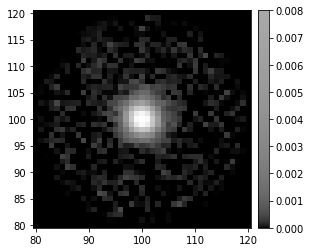

In [43]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale('asinh', min=0.0, max=1.e-3, unit='absolute')
display1.mtv(psfimage)

Access the calibration object which can be used to convert instrumental magnitudes to AB magnitudes

In [44]:
calib = calexp.getPhotoCalib()
calib

PhotoCalib(spatially constant with mean: 0.670522 error: 0.000562393)

### Image cutouts

We can make a cutout from the calexp in our session.

In [45]:
import lsst.geom as afwGeom
import lsst.afw.image as afwImage

In [46]:
bbox = afwGeom.Box2I()
bbox.include(afwGeom.Point2I(400,1400))
bbox.include(afwGeom.Point2I(600,1600))

cutout = calexp[bbox]

Notice that when the image is displayed, the pixel values relate to the parent image.

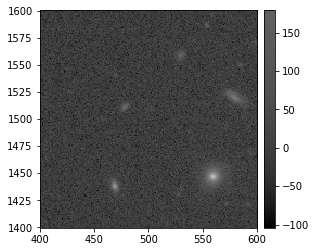

In [47]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale('asinh', 'zscale')
display1.mtv(cutout.image)

The coordinate of the lower-left-hand pixel is XY0.

In [48]:
cutout.getXY0()

Point2I(400, 1400)

If a cutout was all that was desired from the start, we could have used our BoundingBox together with our Butler to have read in only the cutout.

In [49]:
cutout_calexp = butler.get('calexp_sub', bbox=bbox, dataId=dataId)
cutout_calexp.getDimensions()

Extent2I(201, 201)

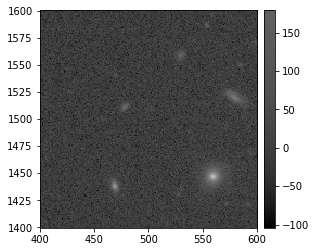

In [50]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale('asinh', 'zscale')
display1.mtv(cutout_calexp.image)

The `clone` method makes a deep copy. The result can be sliced with a BoundingBox

In [51]:
clone_cutout = calexp.clone()[bbox]

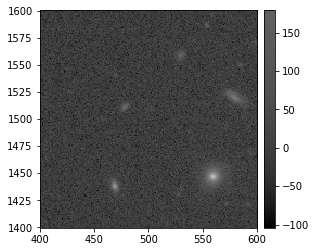

In [52]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(clone_cutout.image)

## Repeat for a coadd

For this last section, we will use Hyper Suprime-Cam (HSC) data that has been modified for tutorial purposes.

In [53]:
coadd_butler = Butler('/project/shared/data/with-globular/')

In [54]:
coadd_butler.getKeys('deepCoadd_calexp')

{'filter': str, 'tract': int, 'patch': str}

We cannot use queryMetadata to look up what is available for coadds. This will be fixed in Butler Gen3.

For the time being, open a terminal and list files in `/project/shared/data/with-globular/` to see what's available. Or just carry on using the following example:

Retrieve a coadd `calexp`, and see what methods it provides.

In [55]:
coadd = coadd_butler.get('deepCoadd_calexp', dataId={'filter':'HSC-I', 'tract':9813, 'patch':'4,4'})

In [56]:
coadd_methods = [m for m in dir(coadd) if not m.startswith('_')]

In [57]:
coadd_methods

['Factory',
 'clone',
 'convertD',
 'convertF',
 'dtype',
 'getBBox',
 'getCutout',
 'getDetector',
 'getDimensions',
 'getFilter',
 'getHeight',
 'getImage',
 'getInfo',
 'getMask',
 'getMaskedImage',
 'getMetadata',
 'getPhotoCalib',
 'getPsf',
 'getVariance',
 'getWcs',
 'getWidth',
 'getX0',
 'getXY0',
 'getY0',
 'hasPsf',
 'hasWcs',
 'image',
 'mask',
 'maskedImage',
 'readFits',
 'readFitsWithOptions',
 'setDetector',
 'setFilter',
 'setImage',
 'setInfo',
 'setMask',
 'setMaskedImage',
 'setMetadata',
 'setPhotoCalib',
 'setPsf',
 'setVariance',
 'setWcs',
 'setXY0',
 'subset',
 'variance',
 'writeFits',
 'writeFitsWithOptions']

In [58]:
set(coadd_methods).symmetric_difference(set(calexp_methods))

set()

The result of the `set` command above shows that a calexp and a coadd have the same methods. This is expected, because they are the same class.

In [59]:
print(calexp.__class__, coadd.__class__)

<class 'lsst.afw.image.exposure.exposure.ExposureF'> <class 'lsst.afw.image.exposure.exposure.ExposureF'>


A `deepCoadd_calexp` and a visit `calexp` differ mainly in the masks and the xy0 value.

In [60]:
calexp.mask.getMaskPlaneDict()

{'BAD': 0,
 'BRIGHT_OBJECT': 12,
 'CLIPPED': 13,
 'CR': 3,
 'CROSSTALK': 9,
 'DETECTED': 5,
 'DETECTED_NEGATIVE': 6,
 'EDGE': 4,
 'INEXACT_PSF': 14,
 'INTRP': 2,
 'NOT_DEBLENDED': 10,
 'NO_DATA': 8,
 'REJECTED': 15,
 'SAT': 1,
 'SENSOR_EDGE': 16,
 'SUSPECT': 7,
 'UNMASKEDNAN': 11}

In [61]:
coadd.mask.getMaskPlaneDict()

{'BAD': 0,
 'BRIGHT_OBJECT': 12,
 'CLIPPED': 13,
 'CR': 3,
 'CROSSTALK': 9,
 'DETECTED': 5,
 'DETECTED_NEGATIVE': 6,
 'EDGE': 4,
 'INEXACT_PSF': 14,
 'INTRP': 2,
 'NOT_DEBLENDED': 10,
 'NO_DATA': 8,
 'REJECTED': 15,
 'SAT': 1,
 'SENSOR_EDGE': 16,
 'SUSPECT': 7,
 'UNMASKEDNAN': 11}

In [62]:
coadd.getXY0()

Point2I(15900, 15900)

Display the coadd with all masks visible.

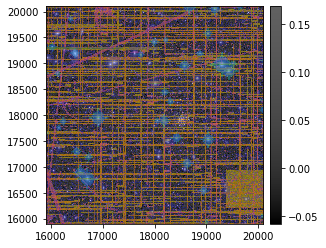

In [63]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(coadd)

Display the image data only with a zoom and pan to some nice-looking galaxies, to show off our hyperbolic arcsine stretch:

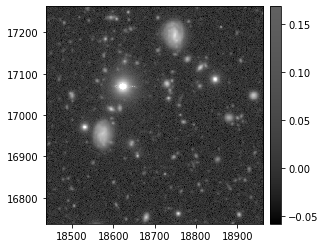

In [64]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(coadd.image)
display1.zoom(16)
display1.pan(18700, 17000)